# Week 9 handin - by Sebastian Bentley (cph-sb287)
Made in collaboration with Sebastian Hansen and Michael Ibsen


### week 9 Exercise Feature space
### Ex 1
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

#### Download the data
- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

#### Feature engineering
- Reduce the dataset by:
    - Make == Honda
    - Fueltype == Gasoline
    - Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
    - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
    - Normalize data (reduce values to be between 0 and 1)

##### Linear regression
- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is y when x=1.
- Show the regression line on a scatterplot with the other datapoints.

## 02 status
A possible solution is made for every exercise.

## 03 solution part 1

In [12]:
import pandas as pd
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
#Programatically download the data from the above link.
#Import the data into a Pandas dataframe.
df = pd.read_csv(Data)

#Show the head of the Pandas dataframe.
headers = df.head()
headers

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


## 03 solution part 2

In [48]:
#Reduce the dataset by:

#Make == Honda
hondas = df[df['Identification.Make'] == "Honda"]

#Fueltype == Gasoline
gas = hondas[hondas['Fuel Information.Fuel Type'] == "Gasoline"]

#Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
outliers = gas[gas['Engine Information.Engine Statistics.Horsepower'] < gas['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)]

#Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
features = outliers[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]

#Normalize data (reduce values to be between 0 and 1)
from sklearn import preprocessing
scalar = preprocessing.MinMaxScaler()
names = features.columns
d = scalar.fit_transform(features)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df



,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.523810,0.548872
1,0.523810,0.548872
2,0.523810,0.548872
3,0.523810,0.548872
4,0.523810,0.548872
...,...,...
172,0.238095,1.000000
173,0.190476,1.000000
174,0.238095,1.000000
175,0.190476,1.000000


## 03 solution part 3

coefficient: [-0.59921419]
predicted y with x = 1: [0.18973875]


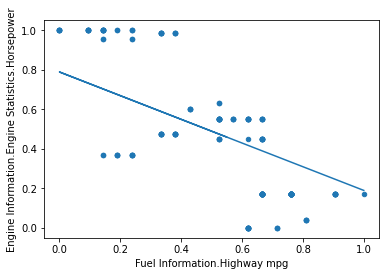

In [112]:
#Perform linear regression where x = horsepower and y = mpg
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
x = scaled_df['Engine Information.Engine Statistics.Horsepower']
x_reshape = np.array(x).reshape(-1,1)
y = scaled_df['Fuel Information.Highway mpg']

model = LinearRegression()
model.fit(x_reshape,y)


#What is the coefficient (slope) of your model? What does this number mean?
coef = model.coef_
print("coefficient: " + str(coef))
# Answer: the coefficient(hældningsgrad) answer means that the data means that the data falls linear by coef

#According to your model, what is y when x=1.
predicted = model.predict([[1]])
print("predicted y with x = 1: " + str(predicted))

#Show the regression line on a scatterplot with the other datapoints.

scaled_df.plot.scatter(x=0, y=1)
#plt.plot([x.min(), y.max()], [x.max(),y.min()])
m, b = np.polyfit(x,y,1)

plt.plot(x,(coef*x+b))

